In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [5]:
img_width = 180
img_height =180 

In [7]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [9]:
data_cat = data_train.class_names

In [11]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [13]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [15]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


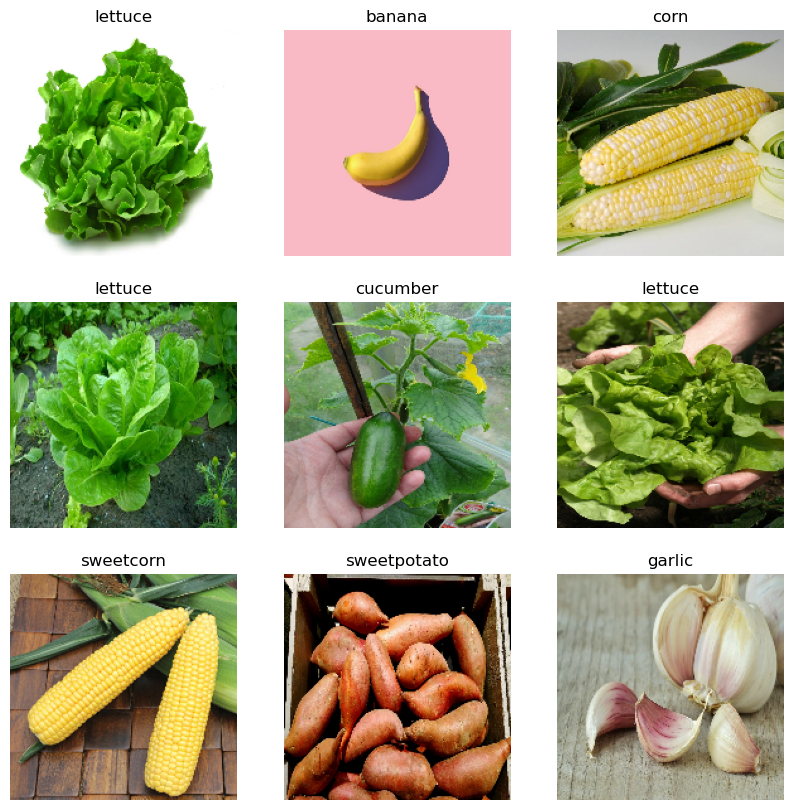

In [17]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [19]:
from tensorflow.keras.models import Sequential

In [21]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [25]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [27]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 27s 250ms/step - accuracy: 0.0498 - loss: 4.6004 - val_accuracy: 0.2593 - val_loss: 2.6760
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.2133 - loss: 2.8183 - val_accuracy: 0.5698 - val_loss: 1.7763
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 235ms/step - accuracy: 0.4383 - loss: 2.0631 - val_accuracy: 0.7977 - val_loss: 0.9640
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 238ms/step - accuracy: 0.6496 - loss: 1.2535 - val_accuracy: 0.8803 - val_loss: 0.4975
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 237ms/step - accuracy: 0.7931 - loss: 0.7005 - val_accuracy: 0.9031 - val_loss: 0.4397
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 234ms/step - accuracy: 0.8884 - loss: 0.4047 - val_accuracy: 0.9202 - val_loss: 0.3716
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 239ms/step - accuracy: 0.9120 - loss: 0.3425 - val_accuracy: 0.9430 - val_loss: 0.3483
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 230ms/step - accuracy: 0.9306 - loss: 0.2713 - val_accu

Text(0.5, 1.0, 'Loss')

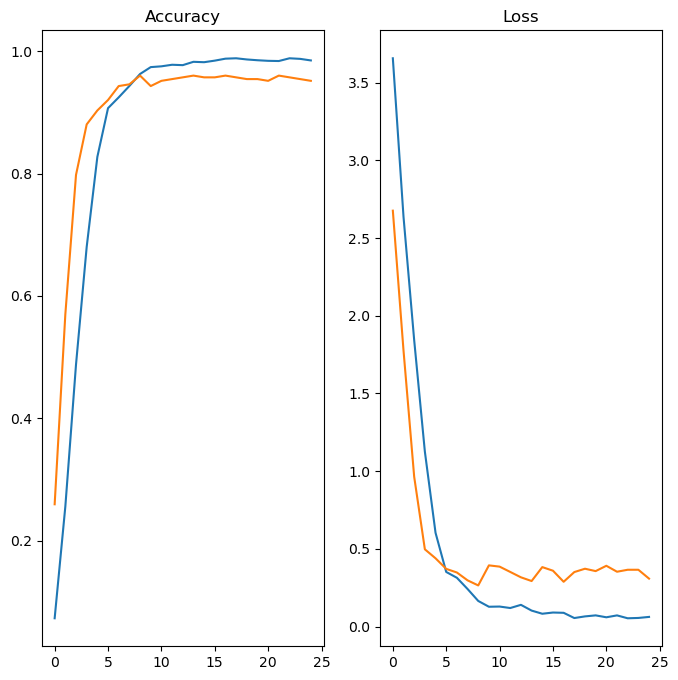

In [29]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [31]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [33]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


In [35]:
score = tf.nn.softmax(predict)

In [37]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 53.28


In [41]:
model.save('Image_classify.keras')